In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.stats.api as sm
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1 О датасете

Имеются оценки качества португальских вин Vinho Verde, выставленные дегустаторами при слепом тестировании в баллах по шкале от 0 до 10

Узнаем, какую оценку (приблизительно) получит новое вино, которого в выборке нет. Обучим модель, иными словами

# 2 Импорт данных и предварительный анализ

Считываем данные

In [4]:
wine_df = pd.read_csv('wine_data.csv', sep='\t', header=0)
wine_df = wine_df.sample(frac=1)

In [5]:
wine_df.head()

,Type,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
1043,red,9.5,0.39,0.41,8.9,0.069,18.0,39.0,0.99859,3.29,0.81,10.9,7
5130,white,6.4,0.28,0.44,7.1,0.048,49.0,179.0,0.99528,3.15,0.48,9.2,5
2312,white,6.4,0.31,0.39,7.5,0.040,57.0,213.0,0.99475,3.32,0.43,10.0,5
3213,white,8.0,0.29,0.49,11.7,0.035,40.0,131.0,0.99580,3.14,0.34,10.8,5
5331,white,7.5,0.28,0.41,1.3,0.044,11.0,126.0,0.99293,3.28,0.45,10.3,5


In [6]:
print(f'Размер всей выборки = {wine_df.shape}')

Размер всей выборки = (6497, 13)


In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1043 to 4731
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         6497 non-null   object 
 1   Fixed acidity (g/l)          6497 non-null   float64
 2   Volatile acidity (g/l)       6497 non-null   float64
 3   Citric acid (g/l)            6497 non-null   float64
 4   Residual sugar (g/l)         6497 non-null   float64
 5   Chlorides (g/l)              6497 non-null   float64
 6   Free sulfur dioxide  (mg/l)  6497 non-null   float64
 7   Total sulfur dioxide (mg/l)  6497 non-null   float64
 8   Density (g/cm3)              6497 non-null   float64
 9   pH                           6497 non-null   float64
 10  Sulphates (g/l)              6497 non-null   float64
 11  Alcohol (%)                  6497 non-null   float64
 12  quality                      6497 non-null   int64  
dtypes: float64(11),

In [8]:
print(f'Типы вин : {wine_df.Type.unique()}')

Типы вин : ['red' 'white']


Информация о типе вина:

In [9]:
wine_df.groupby('Type')['Type'].count()

Type
red      1599
white    4898
Name: Type, dtype: int64

Рассмотрим основные статистики для числовых данных

In [10]:
wine_df.describe()

,Fixed acidity (g/l),Volatile acidity (g/l),Citric acid (g/l),Residual sugar (g/l),Chlorides (g/l),Free sulfur dioxide (mg/l),Total sulfur dioxide (mg/l),Density (g/cm3),pH,Sulphates (g/l),Alcohol (%),quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# 3 Exploratary data analysis (EDA)

Разведочный анализ данных

## 3.1 Target

Выводим распределение экспертных оценок вин в выборке

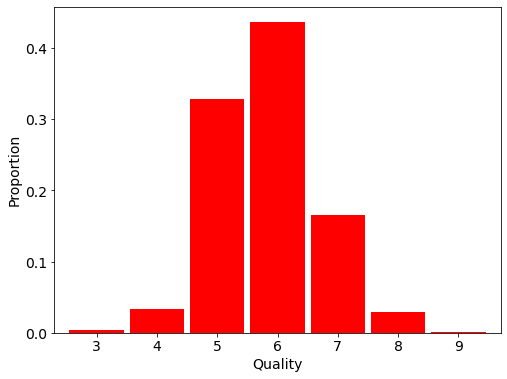

In [11]:
plt.figure(figsize=(8,6))
stat = wine_df.groupby('quality')['quality'].agg(lambda x : float(len(x))/wine_df.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="red")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)
plt.show()

Отложим 25% выборки для последующего контроля качества предсказания

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine_df.loc[:, wine_df.columns != 'quality']
                                                    ,wine_df['quality']
                                                    ,test_size=0.25
                                                    ,stratify=wine_df[['Type', 'quality']])

In [13]:
X_train['Type'] = X_train['Type'].apply(lambda x : -1 if x == 'red' else 1)
X_test['Type'] = X_test['Type'].apply(lambda x : -1 if x == 'red' else 1)

Если нет больше никакой информации о винах, то наше лучшее предположение об оценке $~-$ это среднее имеющихся в обучающей выборке

In [14]:
np.mean(y_train)

5.817733990147783

Если будем предсказывать этой величиной оценку всех вин, на обучающей выборке получим среднеквадратичную ошибку (MSE)

In [15]:
mean_squared_error([np.mean(y_train)]*len(y_train), y_train)**0.5

0.8735940831862377

а на тестовой

In [16]:
mean_squared_error([np.mean(y_train)]*len(y_test), y_test)**0.5

0.8719705746838052

## 3.2 Type

Распределения оценок по типам довольно сильно отличаются

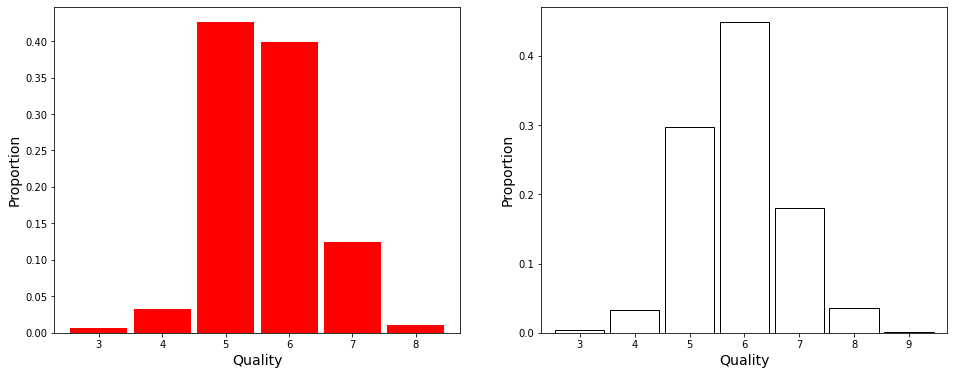

In [17]:
plt.figure(figsize=(16,6))
plt.subplot(121)
stat_red = wine_df[wine_df['Type'] == 'red'].groupby('quality')['quality'].agg(
                                                lambda x: 
                                                    float(len(x))/wine_df[wine_df['Type'] == 'red'].shape[0]
                                                                            )
stat_red.plot(kind='bar', color='r', width=0.9)
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)

plt.subplot(122)
stat_white = wine_df[wine_df['Type'] == 'white'].groupby('quality')['quality'].agg(
                                                lambda x: 
                                                    float(len(x))/wine_df[wine_df['Type'] == 'white'].shape[0]
                                                                            )
stat_white.plot(kind='bar', color='w',edgecolor = 'black', width=0.9)
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Quality', fontsize=14)
plt.show()

Выполним двусторонний t-критерий Стьюдента с предположением о равенстве дисперсий ('pooled') и нулевой гипотезой о равенстве средних.

In [18]:
tmeans = sm.CompareMeans(sm.DescrStatsW(wine_df[wine_df['Type'] == 'white']['quality']), 
                         sm.DescrStatsW(wine_df[wine_df['Type'] == 'red']['quality']))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

4.888069044202176e-22

Поскольку полученное p-value слишком мало (для любого адекватного уровня значимости), то различие между средними статистически значимо

Строим 95% доверительный интервал для разности средних оценок

In [19]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.19293009404017958, 0.29084357932805205)

Для уточнения предсказания, можно оценку каждого вина предсказывать средним по оценкам вин такого же типа в выборке

In [20]:
regressor = LinearRegression()
regressor.fit(X_train['Type'].values.reshape(-1,1), y_train)

LinearRegression()

In [21]:
y_train_predictions = regressor.predict(X_train['Type'].values.reshape(-1,1))

In [22]:
y_test_predictions = regressor.predict(X_test['Type'].values.reshape(-1,1))

In [23]:
mean_squared_error(y_train_predictions, y_train) ** 0.5

0.8671965001753594

In [24]:
mean_squared_error(y_test_predictions, y_test) ** 0.5

0.8662137838266156

Ошибки предсказания немного уменьшились

Истинные оценки вин и их предсказания средними по типам на тестовой выборке

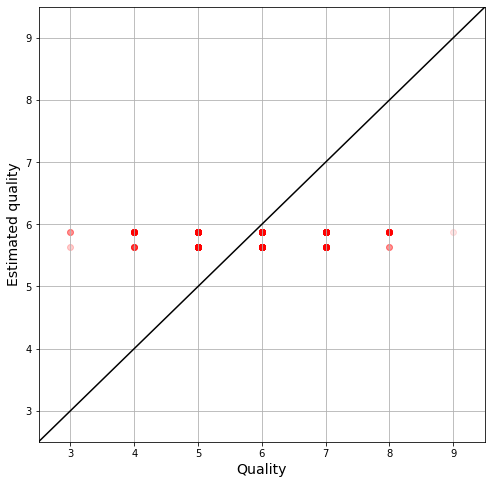

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test_predictions, color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)
plt.show()

Но пока что далеко от истины

## 3.3 Остальные фичи

Есть ещё 11 числовых признаков, описывающих химический состав вин

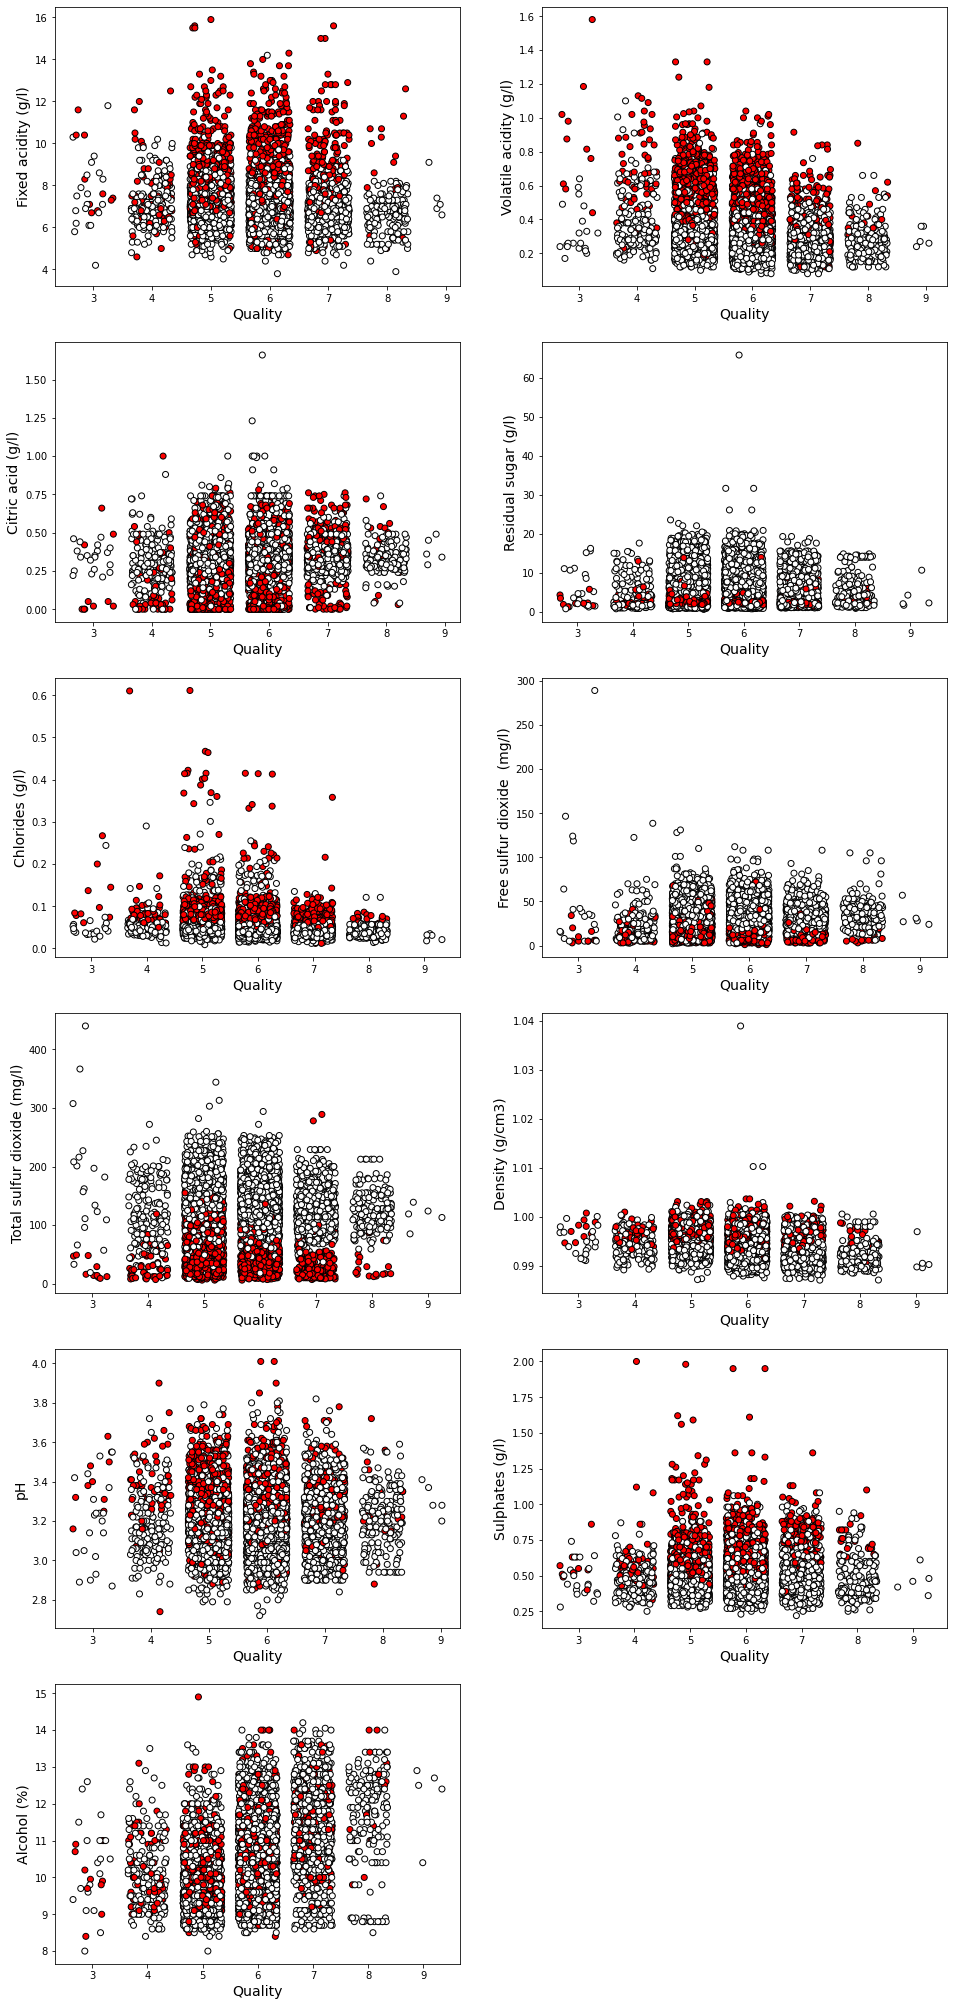

In [26]:
def func(arr):
    return arr + np.random.uniform(low=-0.35, high=0.35, size=len(arr))

plt.figure(figsize=(16, 36))
for i in range (1, 12):
    plt.subplot(6, 2, i)
    plt.scatter(func(wine_df['quality']), wine_df.iloc[:, i], color=wine_df["Type"], edgecolors="black")
    plt.xlabel('Quality', fontsize=14)
    plt.ylabel(str(wine_df.columns[i]), fontsize=14)
plt.show()

Рассмотрим корреляцию между ними

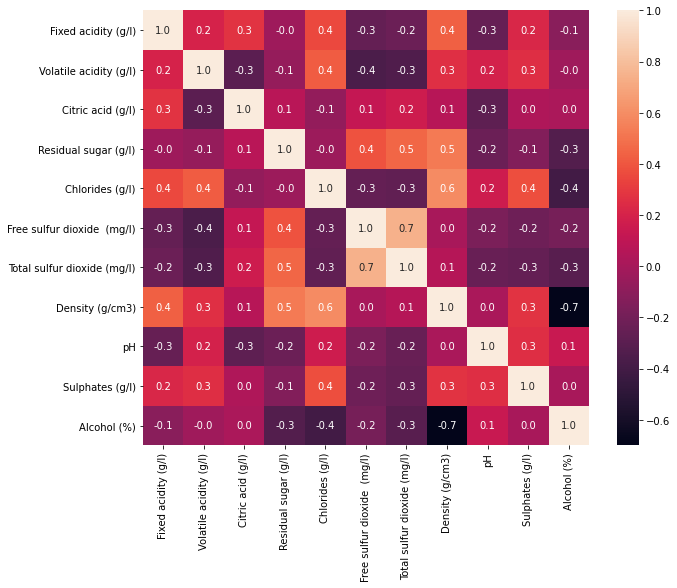

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.select_dtypes(include=['float']).corr(method='spearman'), annot=True, fmt='.1f')
plt.show()

Рассмотрим также их распределения

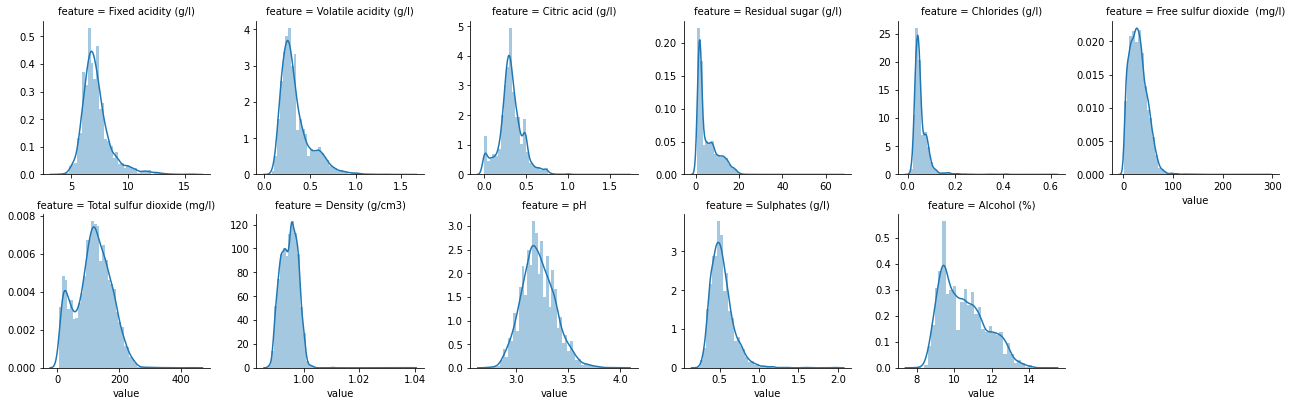

In [28]:
numeric_features = wine_df.select_dtypes(include=['float'])
numeric_features = numeric_features.stack().reset_index().rename(columns={'level_1': 'feature', 0: 'value'})

ax = sns.FacetGrid(data=numeric_features, col='feature', col_wrap=6, sharex=False, sharey=False)
ax.map(sns.distplot, 'value')

plt.subplots_adjust(top=0.9)
plt.show()

Видим, что большинство признаков не являются нормально распределенными $~-$ нормализуем их при помощи логарифмирования

In [29]:
for column in ['Volatile acidity (g/l)', 'Citric acid (g/l)', 'Residual sugar (g/l)', 'Chlorides (g/l)', 
              'Free sulfur dioxide  (mg/l)', 'Total sulfur dioxide (mg/l)', 'Density (g/cm3)', 'Sulphates (g/l)',
              'Alcohol (%)']:
    wine_df[column] = np.log(wine_df[column] + 1)

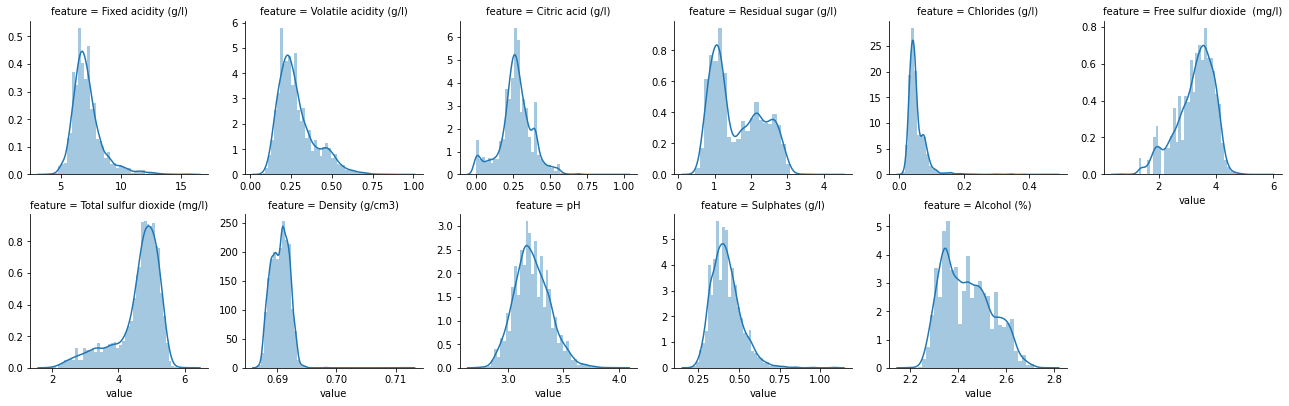

In [30]:
numeric_features = wine_df.select_dtypes(include=['float'])
numeric_features = numeric_features.stack().reset_index().rename(columns={'level_1': 'feature', 0: 'value'})

ax = sns.FacetGrid(data=numeric_features, col='feature', col_wrap=6, sharex=False, sharey=False)
ax.map(sns.distplot, 'value')

plt.subplots_adjust(top=0.9)
plt.show()

Модели всегда проще работать с нормальными или псевдонормальными распределениями

# 4 Моделирование

## 4.1 Baseline Линейная регрессия

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [32]:
mean_squared_error(lm.predict(X_train), y_train) ** 0.5

0.7357474868551664

In [33]:
mean_squared_error(lm.predict(X_test), y_test) ** 0.5

0.722608526241057

Ошибки предсказания существенно уменьшились

Истинные оценки вин и их предсказания линейной моделью

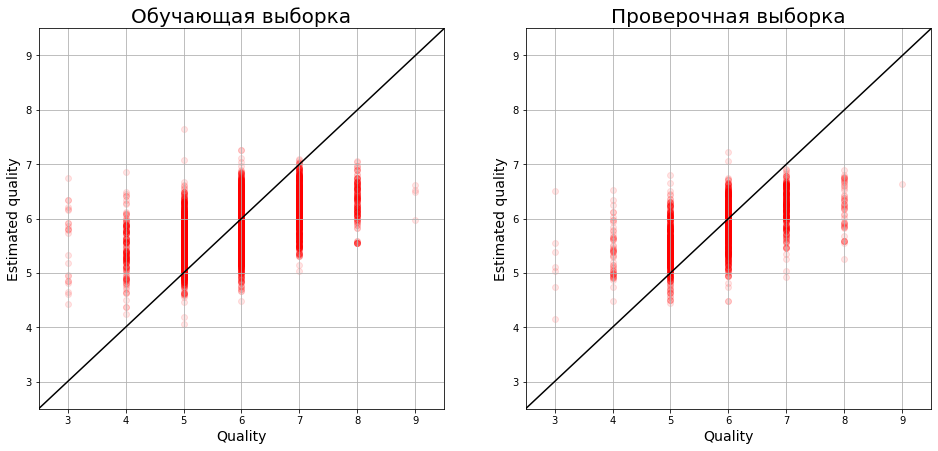

In [34]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(y_train, lm.predict(X_train), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Обучающая выборка', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
plt.scatter(y_test, lm.predict(X_test), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Проверочная выборка', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)
plt.show()

Посчитаем коэффициент детерминации $~-$ долю объяснённой моделью дисперсии отклика (объясняющими переменными)

In [35]:
lm.score(X_test, y_test)

0.31323795114271413

## 4.2 Случайный лес

In [36]:
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3)

In [37]:
mean_squared_error(rf.predict(X_train), y_train) ** 0.5

0.34741124890485187

In [38]:
mean_squared_error(rf.predict(X_test), y_test) ** 0.5

0.6267938944925293

Качество выросло ещё сильнее, хотя модель и переобучилась

Истинные оценки вин и их предсказания случайным лесом

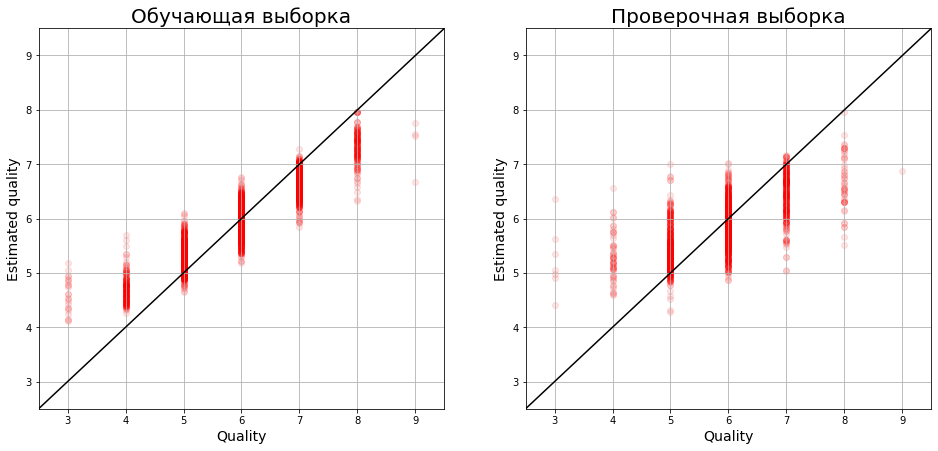

In [39]:
plt.figure(figsize=(16,7))
plt.subplot(121)
plt.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Обучающая выборка', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)

plt.subplot(122)
plt.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
plt.xlim(2.5,9.5)
plt.ylim(2.5,9.5)
plt.plot(range(11), color='black')
plt.grid()
plt.title('Проверочная выборка', fontsize=20)
plt.xlabel('Quality', fontsize=14)
plt.ylabel('Estimated quality', fontsize=14)
plt.show()

Коэффициент детерминации для случайного леса

In [40]:
rf.score(X_test, y_test)

0.48328670123294404

## 4.3 Сравнение линейной регрессии и случайного леса

Ошибки линейной регрессии и случайного леса на тестовой выборке в сравнении

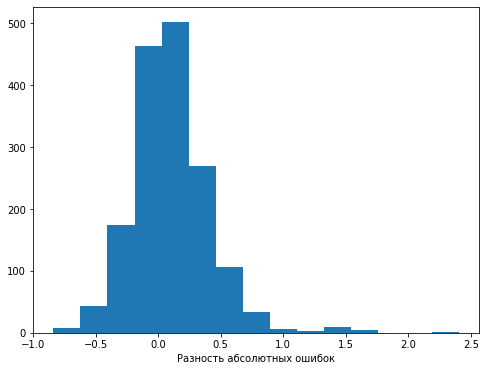

In [41]:
plt.figure(figsize=(8,6))
plt.hist(abs(y_test - lm.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=15)
plt.xlabel('Разность абсолютных ошибок')
plt.show()

In [42]:
tmeans = sm.CompareMeans(sm.DescrStatsW(abs(y_test - lm.predict(X_test))), 
                         sm.DescrStatsW(abs(y_test - rf.predict(X_test))))

tmeans.ttest_ind(alternative='two-sided', usevar='pooled', value=0)[1]

2.077691409864497e-10

Различия между средними абсолютными ошибками значимы

95% доверительный интервал для средней разности абсолютных ошибок

In [43]:
tmeans.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

(0.0686945553444924, 0.12970753523135206)

То есть, используя вместо линейной регрессии случайный лес, предсказание экспертной оценки в среднем точнее

# 5 Анализ важных признаков

Определим, какие признаки обладают наибольшей предсказательной способностью

In [44]:
importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_))
importances.columns = ['feature name', 'importance']
importances.sort_values(by='importance', ascending=False)

,feature name,importance
11,Alcohol (%),0.273055
2,Volatile acidity (g/l),0.134589
6,Free sulfur dioxide (mg/l),0.086613
10,Sulphates (g/l),0.077381
7,Total sulfur dioxide (mg/l),0.069546
4,Residual sugar (g/l),0.067119
9,pH,0.063944
5,Chlorides (g/l),0.063463
3,Citric acid (g/l),0.056749
8,Density (g/cm3),0.053275


Cильнее всего на экспертную оценку качества вина влияет крепкость вина